In [2]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath("../../"))
from dotenv import load_dotenv
load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [3]:
from src import (
    PresentationAnalysis,
    SlideAnalysis,
    Config,
    display_chain_outputs
)
from src.chains.chains import FindPdfChain
from src.config.output_formatting import display_presentation_analysis, display_presentation_from_file
from src.testing_utils import EchoLLM
import logging
from src.config.output_formatting import display_search_result_page


from src.rag import ChromaSlideStore, create_slides_database
from src.webapp.app import format_presentation_results


config = Config()

In [4]:
collection_name = "pres0"
storage = ChromaSlideStore("pres0")

In [ ]:
results = storage.search_query_presentations(
    "Презентация про жд перевозки",
    n_results=30
)

Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 10
--------------------------------------------------------------------------------


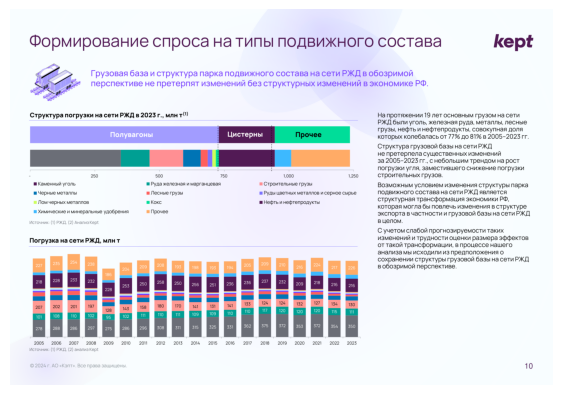

## Kept_Подвижной состав РФ_2024 (20 стр)

|   page_nums |   page_scores |
|------------:|--------------:|
|          10 |        0.4593 |
|          12 |        0.4765 |
|           3 |        0.4859 |
|           9 |        0.4991 |
|           4 |        0.5242 |
|           6 |        0.5292 |
|          13 |        0.5307 |
|          11 |        0.5397 |
|           2 |        0.541  |
|          16 |        0.5412 |
|          14 |        0.555  |
|          15 |        0.557  |
|          17 |        0.5584 |

**Mean Score:** 0.5229
### Page: 10
**Best matching chunk:** `topic_overview`\
**Chunk distances:** 0.4593

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.4593      |
| visual_content           | 0.5082      |
| text_content             | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.4593
> Тема: Формирование спроса

In [ ]:
r = results[1]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)

Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 10
--------------------------------------------------------------------------------


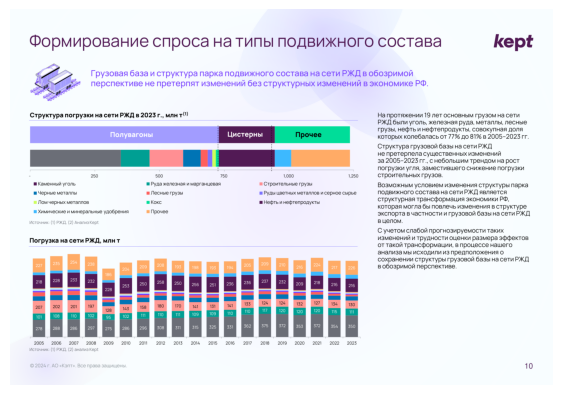


Best matching chunk (topic_overview):
Distance: 0.459
--------------------------------------------------------------------------------
Тема: Формирование спроса на подвижной состав РЖД
Цель: Показать структуру грузовой базы и прогнозы на будущее
Ключевая информация: Основные типы грузов и их доля в общем объеме погрузки.

Chunk distances:
--------------------------------------------------------------------------------
text_content: not matched
visual_content: 0.508
topic_overview: 0.459
conclusions_and_insights: not matched
layout_and_composition: not matched

Full slide content:
--------------------------------------------------------------------------------

text_content:
Заголовок: "Формирование спроса на типы подвижного состава"

Подзаголовок: "Грузовая база и структура парка подвижного состава на сети РЖД в обозримой перспективе не претерпит 
изменений без структурных изменений в экономике РФ."

Текст: "На протяжении 19 лет основным грузом на сети РЖД были уголь, железная руда, м

In [ ]:
display_search_result_page(results[1].best_slide)

Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 20
--------------------------------------------------------------------------------


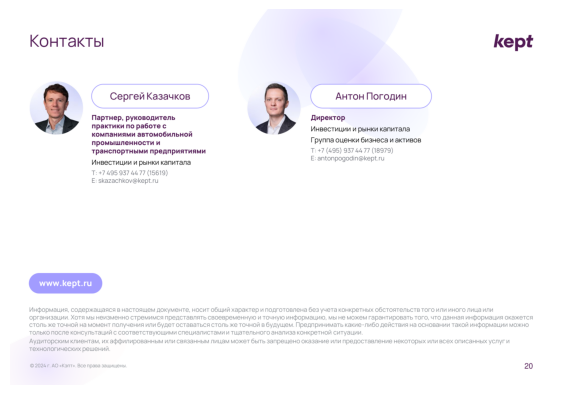

## Kept_Подвижной состав РФ_2024 (20 стр)

|   page_nums |   page_scores |
|------------:|--------------:|
|          20 |        0.5683 |
|          11 |        0.6929 |
|           2 |        0.7276 |

**Mean Score:** 0.6629
### Page: 20
**Best matching chunk:** `topic_overview`\
**Chunk distances:** 0.5683

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5683      |
| text_content             | 0.6131      |
| visual_content           | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5683
> Тема: Контактная информация
>
> Цель: Предоставить контактные данные ключевых сотрудников компании
>
> Ключевая информация: Имена, должности и контактные данные Сергея Казачкова и Антона Погодина.

`text_content` d=0.6131
> Заголовок: "Контакты"
>
> 
>
> Контактные данные:
>
> 
>
> Сергей Казачков
>
> - Партнер, руководитель практики по работе

In [7]:
results = storage.search_query_presentations(
    "Про что рассказывал Сергей Казачков?",
    n_results=30
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)

# Запрос на общую тему

## Без корректировки

Slide from: 2. Пристягина Матрицы компетенций.pdf
Page: 54
--------------------------------------------------------------------------------


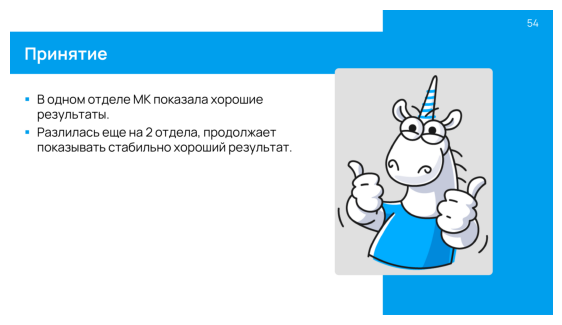

## 2. Пристягина Матрицы компетенций

|   page_nums |   page_scores |
|------------:|--------------:|
|          54 |        0.587  |
|          53 |        0.5931 |
|          55 |        0.6054 |

**Rank Score:** 0.9507
### Page: 54
**Best matching chunk:** `topic_overview`\
**Chunk distances:** 0.5870

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5870      |
| conclusions_and_insights | 0.6850      |
| text_content             | not matched |
| visual_content           | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5870
> Тема: Принятие результатов работы
>
> Цель: Поделиться положительными результатами работы отдела
>
> Ключевая информация: Успехи в одном отделе и дальнейшее развитие в двух других.

`conclusions_and_insights` d=0.6850
> Основные выводы:
>
> - Один из отделов продемонстрировал хорошие результаты.
>
> - Расширение на два новых отдела указывает на ст

In [7]:
results = storage.search_query_presentations(
    "Благополучие",
    n_results=30
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)

## С корректировкой

Slide from: AXES_х_Понимаю_Исследование_практик_благополучия_2024.pdf
Page: 1
--------------------------------------------------------------------------------


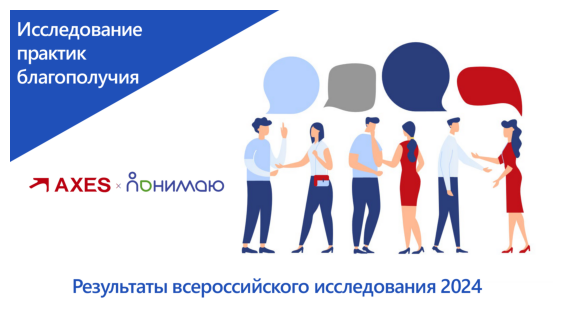

## AXES_х_Понимаю_Исследование_практик_благополучия_2024

|   page_nums |   page_scores |
|------------:|--------------:|
|           1 |        0.581  |
|           4 |        0.623  |
|          14 |        0.6267 |
|           9 |        0.634  |
|          20 |        0.6658 |
|          21 |        0.6732 |
|          17 |        0.6805 |
|           6 |        0.6816 |

**Rank Score:** 0.4380
### Page: 1
**Best matching chunk:** `conclusions_and_insights`\
**Chunk distances:** 0.5810

| chunk type               | distance    |
|:-------------------------|:------------|
| conclusions_and_insights | 0.5810      |
| text_content             | 0.6330      |
| topic_overview           | 0.6478      |
| visual_content           | not matched |
| layout_and_composition   | not matched |
#### Content:
`conclusions_and_insights` d=0.5810
> Слайд подчеркивает важность благополучия в обществе и представляет результаты, которые могут быть полезны для дальнейшего анализа и применения в различ

In [26]:
results = storage.search_query_presentations(
    "Благополучие",
    n_results=30
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)

Slide from: 4.Эволюция отбора кандидатов в системе товарных рекомендаций Ozon_Александр Краснов_вер.3.pdf
Page: 29
--------------------------------------------------------------------------------


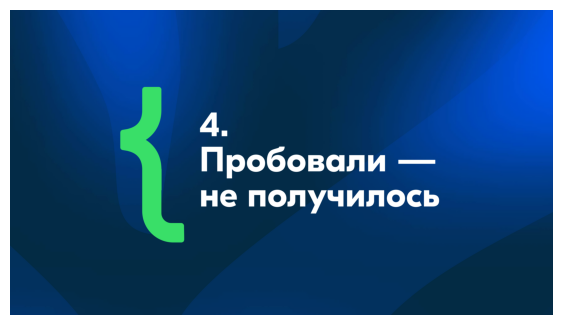

## 4.Эволюция отбора кандидатов в системе товарных рекомендаций Ozon_Александр Краснов_вер.3

|   page_nums |   page_scores |
|------------:|--------------:|
|          29 |        0.5761 |
|          38 |        0.7067 |

**Rank Score:** 0.6196
### Page: 29
**Best matching chunk:** `conclusions_and_insights`\
**Chunk distances:** 0.5761

| chunk type               | distance    |
|:-------------------------|:------------|
| conclusions_and_insights | 0.5761      |
| text_content             | not matched |
| visual_content           | not matched |
| topic_overview           | not matched |
| layout_and_composition   | not matched |
#### Content:
`conclusions_and_insights` d=0.5761
> Основное сообщение: Неудачи являются частью процесса и могут привести к важным урокам.



---

### Page: 38
**Best matching chunk:** `conclusions_and_insights`\
**Chunk distances:** 0.7067

| chunk type               | distance    |
|:-------------------------|:------------|
| conclusions_and_insights | 0

In [25]:
r = results[1]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)

In [16]:
import numpy as np

scores = np.array([0.3, 0.5, 0.4, 0.2])
scores = np.array([0.3, 0.5, 0.4, 0.8])
n = len(scores)
weights = np.arange(n)[::-1] + 1
weigthed_score = (scores * weights).sum() / weights.sum()

# Adjust weighted score
k = 3
p = 4
rank_score = -k * n / (1 - p * n) * weigthed_score

weigthed_score, rank_score

(0.43, 0.34400000000000003)

Slide from: ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России.pdf
Page: 5
--------------------------------------------------------------------------------


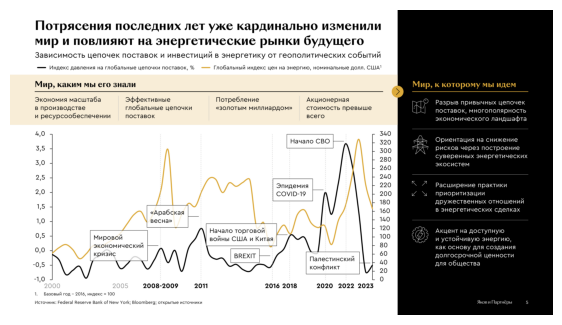

## ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России

|   page_nums |   page_scores |
|------------:|--------------:|
|           5 |        0.5265 |
|          15 |        0.5685 |
|           9 |        0.6067 |
|          21 |        0.6126 |
|           6 |        0.6434 |
|          18 |        0.6457 |
|           7 |        0.6563 |
|          17 |        0.6579 |
|          19 |        0.6584 |

**Rank Score:** 0.4146
### Page: 5
**Best matching chunk:** `topic_overview`\
**Chunk distances:** 0.5265

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5265      |
| visual_content           | 0.5733      |
| text_content             | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5265
> Тема: Влияние геополитических событий на энергетические рынки
>
> Цель: Показать взаимосвязь между глобальными событиями, цепочками по

In [29]:
results = storage.search_query_presentations(
    "График с геополитическими событиями",
    n_results=30
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)